[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stfc/janus-core/blob/main/docs/source/tutorials/cli/phonons.ipynb)

# Phonons

`janus-core` contains an interface to [phonopy](https://phonopy.github.io/phonopy/) to compute phonons and ready made workflows these calculations.

## Set up environment (optional)

These steps are required for Google Colab, but may work on other systems too:

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

# ! pip uninstall torch torchaudio torchvision numpy -y
# ! uv pip install janus-core[all] data-tutorials torch==2.5.1 --system
# get_ipython().kernel.do_shutdown(restart=True)

Use `data_tutorials` to get the data required for this tutorial:

In [ ]:
from data_tutorials.data import get_data

get_data(
    url="https://raw.githubusercontent.com/stfc/janus-core/main/docs/source/tutorials/data/",
    filename=["NaCl.cif"],
    folder="../data",
)

view the data

In [1]:
from ase.io import read
from weas_widget import WeasWidget

NaCl = read("../data/NaCl.cif")
print(NaCl.cell)
v=WeasWidget()
v.from_ase(NaCl)
v.avr.model_style = 1
v

Cell([5.63, 5.63, 5.63])


WeasWidget(children=(BaseWidget(atoms={'species': {'Na': 'Na', 'Cl': 'Cl'}, 'cell': [5.63, 0.0, 0.0, 0.0, 5.63…

## Command-line help and options

Once `janus-core` is installed, the `janus phonons`  command should be available. You may want to execute it in a real terminal to see all the options.

In [2]:
! janus phonons --help

                                                                                
 Usage: janus phonons [OPTIONS]                                                 
                                                                                
 Calculate phonons and save results.                                            
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ *  --struct                               PATH             Path of structure │
│                                                            to simulate.      │
│                                                            [default: None]   │
│                                                            [required]        │
│    --supercell                            TEXT             Supercell matrix, │
│                                                            in the Phonopy    │
│                           

## simple calculation

start by creating a config for the calculations. In this we performs

- geometry optimisation
- force constants calculations
- band structure (on a path determined by seekpath)
- density of states calculation

In [3]:
%%writefile phonons.yml

supercell: 2 2 2
displacement: 0.001
fmax: 1.0e-6
bands: True
dos: True
minimize: True
minimize-kwargs:
  write_results: True
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons.yml


now run the calculation itself

In [4]:
! janus phonons --config phonons.yml --struct ../data/NaCl.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

explore the results

In [5]:
!ls janus_results/

NaCl-auto_bands.yml.xz            NaCl-mace-geomopt-log.yml
NaCl-bands.svg                    NaCl-mace-geomopt-summary.yml
NaCl-bs-dos.svg                   NaCl-mace-opt.extxyz
NaCl-deformed-geomopt-log.yml     NaCl-opt.extxyz
NaCl-deformed-geomopt-summary.yml NaCl-phonons-log.yml
NaCl-deformed-opt.extxyz          NaCl-phonons-summary.yml
NaCl-deformed-traj.extxyz         NaCl-phonopy.yml
NaCl-dos.dat                      NaCl-sevennet-geomopt-log.yml
NaCl-dos.svg                      NaCl-sevennet-geomopt-summary.yml
NaCl-force_constants.hdf5         NaCl-sevennet-opt.extxyz


Cell([[5.713563543365217, 1.8332163481995608e-15, 4.754467402654071e-14], [3.0202271055772404e-14, 5.713563543365362, -1.1609437950735153e-13], [2.5690502526151777e-14, -1.8339327482739338e-13, 5.71356354336537]])


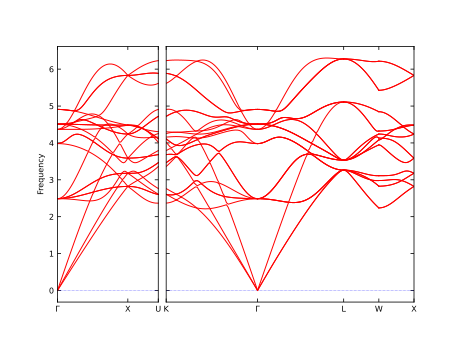

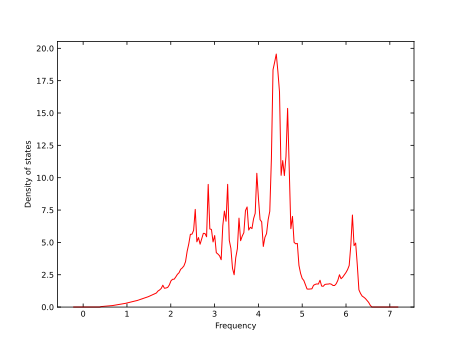

In [6]:
from IPython.display import SVG, display

NaCl_opt = read("janus_results/NaCl-opt.extxyz")
print(NaCl_opt.cell)
display(SVG("janus_results/NaCl-bands.svg"))
display(SVG("janus_results/NaCl-dos.svg"))

## advanced options

we compute thermal properties and also we specify the granularity of the DOS

In [7]:
%%writefile phonons-adv.yml

supercell: 2 2 2
displacement: 0.001
fmax: 1.0e-6
thermal: True
temp-min: 0
temp-max: 1000
temp-step: 10
bands: True
dos: True
pdos: False
dos-kwargs:
  freq_pitch: 0.05
mesh: [11,11,11]
minimize: True
minimize-kwargs:
  write_results: True
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    dispersion: False
    skin: 0 
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons-adv.yml


In [8]:
! janus phonons --config phonons-adv.yml --struct ../data/NaCl.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

In [9]:
!ls janus_results/

NaCl-auto_bands.yml.xz            NaCl-mace-geomopt-summary.yml
NaCl-bands.svg                    NaCl-mace-opt.extxyz
NaCl-bs-dos.svg                   NaCl-opt.extxyz
NaCl-deformed-geomopt-log.yml     NaCl-phonons-log.yml
NaCl-deformed-geomopt-summary.yml NaCl-phonons-summary.yml
NaCl-deformed-opt.extxyz          NaCl-phonopy.yml
NaCl-deformed-traj.extxyz         NaCl-sevennet-geomopt-log.yml
NaCl-dos.dat                      NaCl-sevennet-geomopt-summary.yml
NaCl-dos.svg                      NaCl-sevennet-opt.extxyz
NaCl-force_constants.hdf5         NaCl-thermal.yml
NaCl-mace-geomopt-log.yml


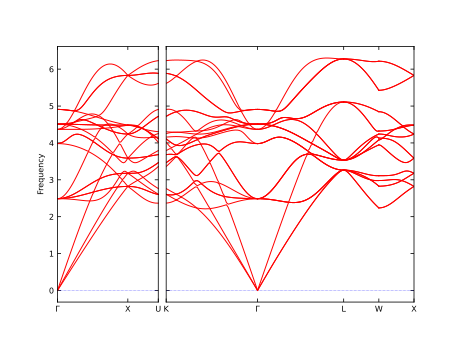

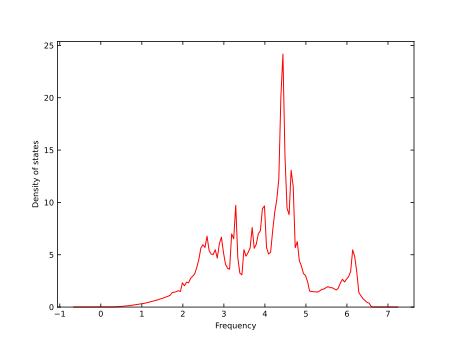

In [10]:
from IPython.display import SVG, display
display(SVG("janus_results/NaCl-bands.svg"))
display(SVG("janus_results/NaCl-dos.svg"))

## phonons under pressure


In [11]:
%%writefile phonons-pressure.yml

supercell: 2 2 2
displacement: 0.001
fmax: 1.0e-6
thermal: True
temp-min: 0
temp-max: 1000
temp-step: 10
bands: True
dos: True
pdos: False
dos-kwargs:
  freq_pitch: 0.05
mesh: [11,11,11]
minimize: True
minimize-kwargs:
  write_results: True
  filter_kwargs:
      scalar_pressure: 1.0
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    dispersion: False
    skin: 0 
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons-pressure.yml


In [12]:
! janus phonons --config phonons-pressure.yml --struct ../data/NaCl.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

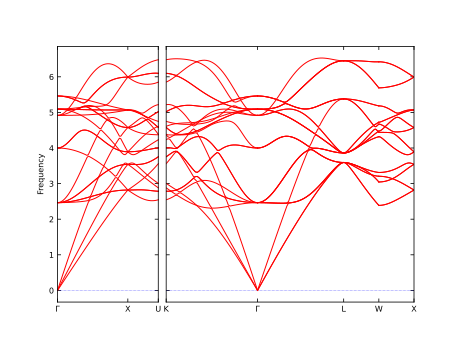

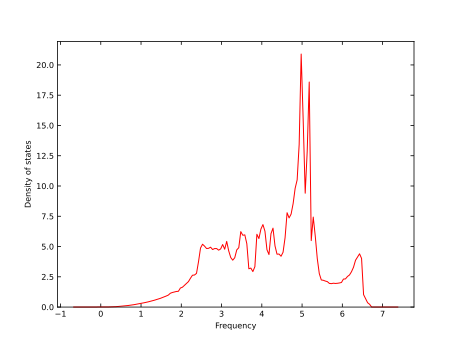

In [13]:
from IPython.display import SVG, display
display(SVG("janus_results/NaCl-bands.svg"))
display(SVG("janus_results/NaCl-dos.svg"))

## isotropic optimisation of the cell

In [14]:
%%writefile phonons-iso.yml

supercell: 2 2 2
displacement: 0.001
fmax: 1.0e-6
thermal: True
temp-min: 0
temp-max: 1000
temp-step: 10
bands: True
dos: True
pdos: False
dos-kwargs:
  freq_pitch: 0.05
mesh: [11,11,11]
minimize: True
minimize-kwargs:
  write_results: True
  filter_kwargs:
    hydrostatic_strain: True
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    dispersion: False
    skin: 0 
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons-iso.yml


In [15]:
!janus phonons --config phonons-iso.yml --struct ../data/NaCl.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

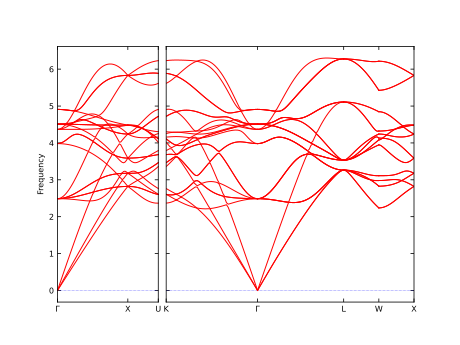

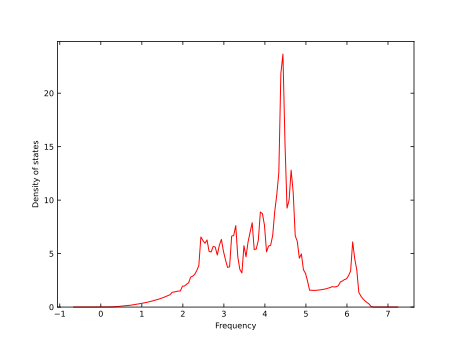

In [16]:
from IPython.display import SVG, display
display(SVG("janus_results/NaCl-bands.svg"))
display(SVG("janus_results/NaCl-dos.svg"))

## using a path for band structure

download mof-5.cif and paths.yaml from examples folder

In [ ]:
get_data(
    url="https://raw.githubusercontent.com/stfc/janus-core/main/docs/source/tutorials/data/",
    filename=["mof-5.cif", "paths.yaml"],
    folder="../data",
)

In [17]:
mof5 = read("../data/mof-5.cif")
v=WeasWidget()
v.from_ase(mof5)
v.avr.model_style = 1
v

WeasWidget(children=(BaseWidget(atoms={'species': {'Zn': 'Zn', 'O': 'O', 'C': 'C', 'H': 'H'}, 'cell': [18.4329…

In [18]:
%%writefile phonons-mof5.yml

supercell: 1 1 1
displacement: 0.001
fmax: 1.0e-6
thermal: True
temp-min: 0
temp-max: 1000
temp-step: 10
bands: True
dos: True
pdos: False
dos-kwargs:
  freq_pitch: 0.05
mesh: [11,11,11]
minimize: True
minimize-kwargs:
  write_results: True
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    dispersion: False
    skin: 0 
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons-mof5.yml


please note parameters here are chosen for speed rather than correctness

In [19]:
! janus phonons --config phonons-mof5.yml --struct ../data/mof-5.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

In [20]:
!ls janus_results/

NaCl-auto_bands.yml.xz            NaCl-phonopy.yml
NaCl-bands.svg                    NaCl-sevennet-geomopt-log.yml
NaCl-bs-dos.svg                   NaCl-sevennet-geomopt-summary.yml
NaCl-deformed-geomopt-log.yml     NaCl-sevennet-opt.extxyz
NaCl-deformed-geomopt-summary.yml NaCl-thermal.yml
NaCl-deformed-opt.extxyz          mof-5-auto_bands.yml.xz
NaCl-deformed-traj.extxyz         mof-5-bands.svg
NaCl-dos.dat                      mof-5-bs-dos.svg
NaCl-dos.svg                      mof-5-dos.dat
NaCl-force_constants.hdf5         mof-5-dos.svg
NaCl-mace-geomopt-log.yml         mof-5-force_constants.hdf5
NaCl-mace-geomopt-summary.yml     mof-5-opt.extxyz
NaCl-mace-opt.extxyz              mof-5-phonons-log.yml
NaCl-opt.extxyz                   mof-5-phonons-summary.yml
NaCl-phonons-log.yml              mof-5-phonopy.yml
NaCl-phonons-summary.yml          mof-5-thermal.yml


In [21]:
from IPython.display import SVG, display
display(SVG("janus_results/mof-5-bs-dos.svg"))

In [22]:
%%writefile phonons-mof5-path.yml

supercell: 1 1 1
displacement: 0.001
fmax: 1.0e-6
thermal: True
temp-min: 0
temp-max: 1000
temp-step: 10
bands: True
dos: True
pdos: False
dos-kwargs:
  freq_pitch: 0.05
mesh: [11,11,11]
qpoint-file: ../data/paths.yaml
minimize: True
minimize-kwargs:
  write_results: True
arch: mace_mp
write-full: False
plot-to-file: True
calc-kwargs:
    dispersion: False
    skin: 0 
    model:  medium-mpa-0
device: cpu
tracker: False

Writing phonons-mof5-path.yml


In [23]:
! janus phonons --config phonons-mof5-path.yml --struct ../data/mof-5.cif

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

In [24]:
! ls janus_results/

NaCl-auto_bands.yml.xz            NaCl-sevennet-geomopt-log.yml
NaCl-bands.svg                    NaCl-sevennet-geomopt-summary.yml
NaCl-bs-dos.svg                   NaCl-sevennet-opt.extxyz
NaCl-deformed-geomopt-log.yml     NaCl-thermal.yml
NaCl-deformed-geomopt-summary.yml mof-5-auto_bands.yml.xz
NaCl-deformed-opt.extxyz          mof-5-bands.svg
NaCl-deformed-traj.extxyz         mof-5-bands.yml.xz
NaCl-dos.dat                      mof-5-bs-dos.svg
NaCl-dos.svg                      mof-5-dos.dat
NaCl-force_constants.hdf5         mof-5-dos.svg
NaCl-mace-geomopt-log.yml         mof-5-force_constants.hdf5
NaCl-mace-geomopt-summary.yml     mof-5-opt.extxyz
NaCl-mace-opt.extxyz              mof-5-phonons-log.yml
NaCl-opt.extxyz                   mof-5-phonons-summary.yml
NaCl-phonons-log.yml              mof-5-phonopy.yml
NaCl-phonons-summary.yml          mof-5-thermal.yml
NaCl-phonopy.yml


In [25]:
display(SVG("janus_results/mof-5-bs-dos.svg"))

## extra bits

now as a challenge you can do a more realistic example, change the above example to
-  use a 2 2 2 supercell 
- use a more accurate model for MoFs mof0_v2 from here https://github.com/ddmms/data/tree/main/mace-mof-0/v2

this is part of this paper if you want to know more: https://arxiv.org/abs/2412.02877